# EDA

In [ ]:
import pandas as pd

In [ ]:
base_path = './'

In [ ]:
train_data = pd.read_csv(base_path + '/data/train_task_3_4.csv')

**train data exploration**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382727 entries, 0 to 1382726
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   QuestionId     1382727 non-null  int64
 1   UserId         1382727 non-null  int64
 2   AnswerId       1382727 non-null  int64
 3   IsCorrect      1382727 non-null  int64
 4   CorrectAnswer  1382727 non-null  int64
 5   AnswerValue    1382727 non-null  int64
dtypes: int64(6)
memory usage: 63.3 MB


null check → there is no null-value

In [ ]:
train_data.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


Check the basic shape and columns of a dataframe

In [ ]:
train_data['CorrectAnswer'].value_counts()

3    385401
2    375536
1    363010
4    258780
Name: CorrectAnswer, dtype: int64

In [ ]:
train_data['AnswerValue'].value_counts()

3    384002
2    380878
1    338024
4    279823
Name: AnswerValue, dtype: int64

The range of the answer value is from 1 to 4.

In [ ]:
train_data.sort_values(by='QuestionId')

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
912504,0,3970,1406664,0,1,2
1268999,0,1110,494458,1,1,1
134266,0,3472,424118,1,1,1
941963,0,2090,231381,1,1,1
1159536,0,2583,1201471,0,1,2
...,...,...,...,...,...,...
297915,947,4006,1059085,0,2,1
662905,947,5288,1351488,0,2,4
429413,947,5022,988943,1,2,2
726723,947,2595,1382585,1,2,2


In [ ]:
train_data.sort_values(by='UserId')

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
945966,742,1,266791,1,3,3
1036313,472,1,1131099,0,4,3
441608,626,1,329200,0,2,3
870257,581,1,380741,0,3,2
1278963,391,1,676019,0,4,1
...,...,...,...,...,...,...
1215228,146,6147,1374105,0,4,2
703132,30,6147,78530,1,1,1
1268621,74,6147,1375032,1,1,1
778085,147,6147,38845,1,2,2


It seems that one user has answered multiple questions.

In [ ]:
train_data.groupby('QuestionId').count()

,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
QuestionId,,,,,
0,2812,2812,2812,2812,2812
1,14,14,14,14,14
2,2313,2313,2313,2313,2313
3,2672,2672,2672,2672,2672
4,1704,1704,1704,1704,1704
...,...,...,...,...,...
943,2653,2653,2653,2653,2653
944,189,189,189,189,189
945,2337,2337,2337,2337,2337


There are a total of 948 questions with QuestionId ranging from 0 to 947.

# Get Entropy

In [ ]:
import scipy.stats as stats

def entropy(x):
  value = x.value_counts(normalize=True)
  return stats.entropy(value)

#### correctness entropy

In [ ]:
correctness_entropy = train_data.groupby('QuestionId')['IsCorrect'].agg(entropy)

In [ ]:
correctness_entropy

QuestionId
0      0.686739
1      0.682908
2      0.666559
3      0.488020
4      0.673579
         ...   
943    0.684269
944    0.410116
945    0.681035
946    0.689856
947    0.665454
Name: IsCorrect, Length: 948, dtype: float64

data visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

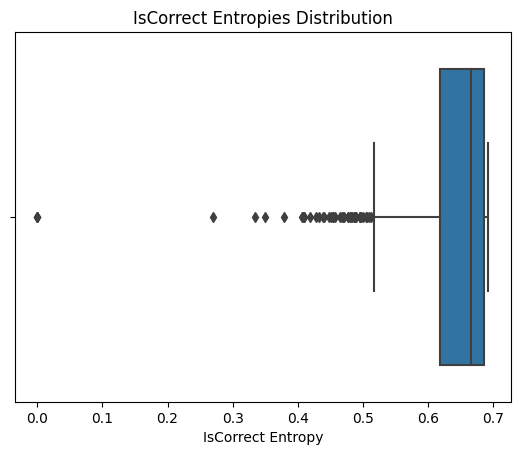

In [ ]:
sns.boxplot(x=correctness_entropy)
plt.title('IsCorrect Entropies Distribution')
plt.xlabel('IsCorrect Entropy')
plt.show()

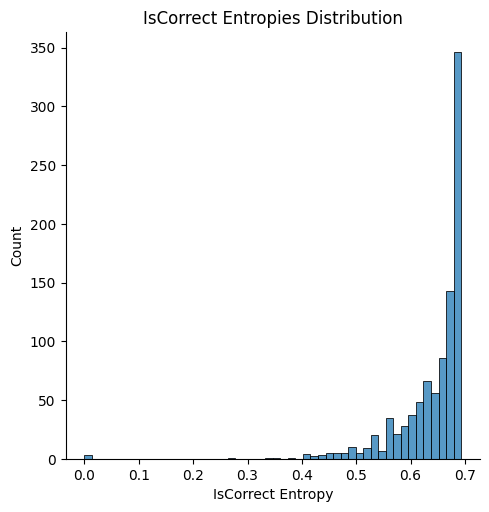

In [ ]:
sns.displot(correctness_entropy)
plt.title('IsCorrect Entropies Distribution')
plt.xlabel('IsCorrect Entropy')
plt.show()

#### selection entropy

In [ ]:
selection_entropy = train_data.groupby('QuestionId')['AnswerValue'].agg(entropy)

In [ ]:
selection_entropy

QuestionId
0      1.194456
1      0.876006
2      1.331663
3      0.695423
4      1.324321
         ...   
943    0.958544
944    1.312404
945    1.260934
946    1.236733
947    1.082614
Name: AnswerValue, Length: 948, dtype: float64

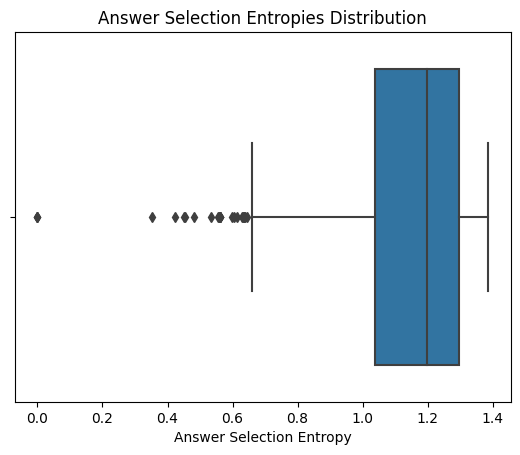

In [ ]:
sns.boxplot(x=selection_entropy)
plt.title('Answer Selection Entropies Distribution')
plt.xlabel('Answer Selection Entropy')
plt.show()

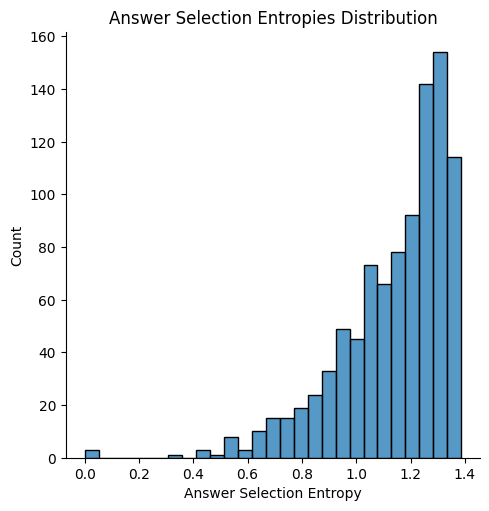

In [ ]:
sns.displot(selection_entropy)
plt.title('Answer Selection Entropies Distribution')
plt.xlabel('Answer Selection Entropy')
plt.show()

# Calculate ranking

In [ ]:
def calculate_rank(series, ascending=False):
  return series.rank(method='first', ascending=ascending).astype('int16')

In [ ]:
ranking_data = pd.DataFrame()

In [ ]:
ranking_data['correctness'] = calculate_rank(correctness_entropy)
ranking_data['answer_selection'] = calculate_rank(selection_entropy)
ranking_data

,correctness,answer_selection
QuestionId,,
0,247,484
1,293,844
2,481,124
3,915,908
4,405,150
...,...,...
943,274,780
944,938,188
945,324,331


In [ ]:
ranking_data['correctness+selection'] = calculate_rank(ranking_data.mean(axis='columns'), ascending=True)
ranking_data

,correctness,answer_selection,correctness+selection
QuestionId,,,
0,247,484,391
1,293,844,672
2,481,124,230
3,915,908,919
4,405,150,160
...,...,...,...
943,274,780,636
944,938,188,669
945,324,331,296


# Create submission

In [ ]:
submission = pd.read_csv(base_path+'/submission/template.csv')
submission

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
943,943,NaN
944,944,NaN
945,945,NaN
946,946,NaN


In [ ]:
submission_dir = base_path + '/submission/'

1. correctness

In [ ]:
submission_file = 'submission_correctness'
submission['ranking'] = ranking_data['correctness']
submission.to_csv(submission_dir + submission_file, index=False)

2. answer selection

In [ ]:
submission_file = 'submission_answer_selection'
submission['ranking'] = ranking_data['answer_selection']
submission.to_csv(submission_dir + submission_file, index=False)

3. correctness + answer selection

In [ ]:
submission_file = 'submission_correctness+selection'
submission['ranking'] = ranking_data['correctness+selection']
submission.to_csv(submission_dir + submission_file, index=False)

# Evaluation

In [ ]:
eval_test = pd.read_csv(base_path + '/data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [ ]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

<Axes: >

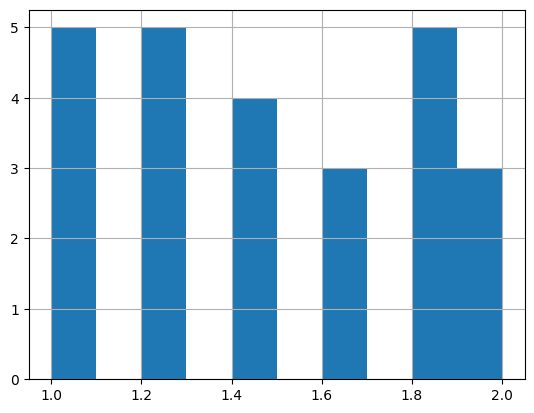

In [ ]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [ ]:
eval_test['preference'] = calc_preference(eval_test['score'])

In [ ]:
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,15,15,145,762,2,2,2,2.0,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1,1.2,1
2,25,25,278,195,1,1,1,1.0,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1,1.2,1


In [ ]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    print(submission_preference)

    return submission_preference

1. correctness

In [ ]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_correctness')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2]


In [ ]:
#calculate similarity
similarity_score_1 = (eval_test['preference'] == evaluate_correctness['preference']).mean()
similarity_score_1

0.48

2. answer selection

In [ ]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_answer_selection')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]


In [ ]:
#calculate similarity
similarity_score_2 = (eval_test['preference'] == evaluate_correctness['preference']).mean()
similarity_score_2

0.64

3. correctness + answer selection

In [ ]:
submission_correctness = pd.read_csv(base_path + '/submission/submission_correctness+selection')
evaluate_correctness = pd.DataFrame(evaluate(eval_test, submission_correctness), columns=['preference'])

[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2]


In [ ]:
#calculate similarity
similarity_score_3 = (eval_test['preference'] == evaluate_correctness['preference']).mean()
similarity_score_3